In [84]:
import numpy as np
import pandas as pd

In [85]:
from sklearn.metrics import r2_score

In [86]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [89]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Следующие признаки имеют пропуски: "LifeSquare", "Healthcare_1"

In [90]:
df_az = df_train.select_dtypes(include = ["float64", "int64"])

Нарисуем гистограмы для каждого признака для визуального выявления "плохих" данных 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000404394A288>,
      dtype=object)

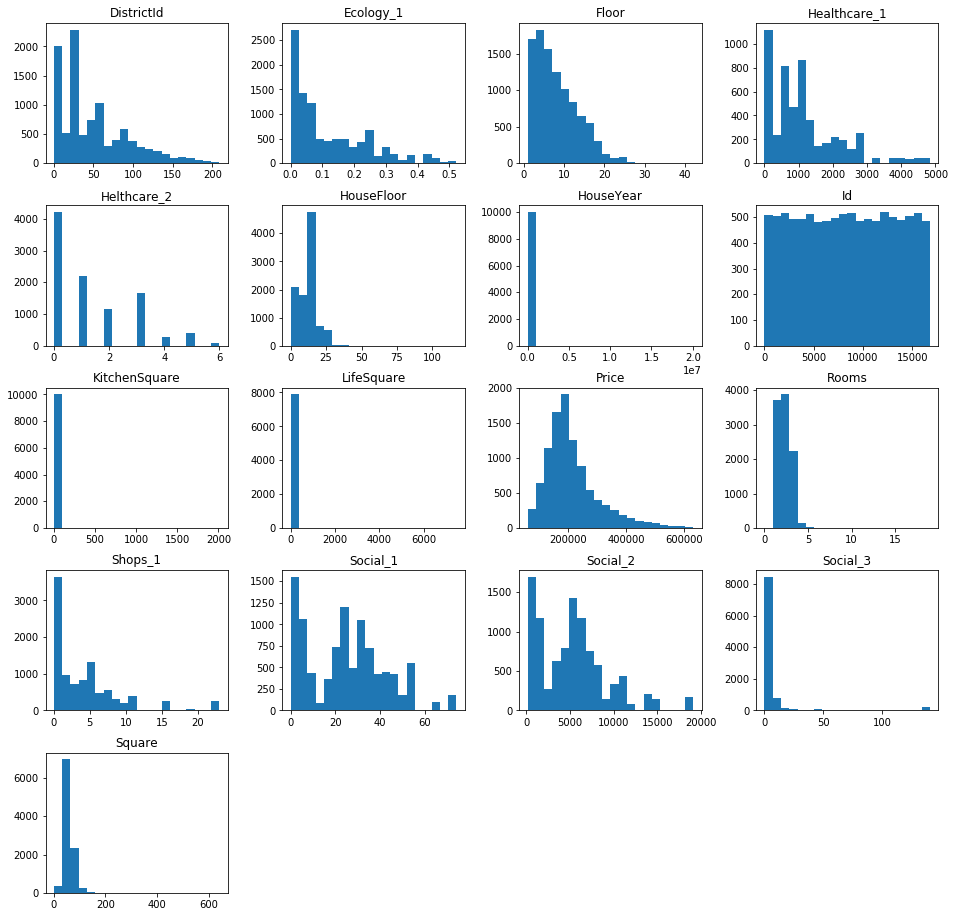

In [91]:
df_az.hist(figsize = (16,16), bins = 20, grid = False)

"Плохие" данные присутствуют в следующих признаках: "HouseYear","LifeSquare", "KitchenSquare" 

# Заполнение пропущенных данных

In [92]:
def null_to_median(df, feature):
    df.loc[df[feature].isnull(), feature] = df_train[feature].median()

In [93]:
null_to_median(df_train, "LifeSquare")
null_to_median(df_train, "Healthcare_1")
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


# ВВедение Dummies переменных для признаков: Ecology_2, Ecology_3, Shops_2

In [94]:
def get_dummies(df, feature):
    df2 = pd.DataFrame()
    df2 = pd.concat([df, pd.get_dummies(df[feature])], axis=1)
    df2 = df2.drop(columns = ['A'])
    df2.rename(columns = {'B':(feature + "B")}, inplace = True)
    return df2

In [95]:
df_train = get_dummies(df_train, "Ecology_2")
df_train = get_dummies(df_train, "Ecology_3")
df_train = get_dummies(df_train, "Shops_2")

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
Ecology_2B       10000 non-null uint8
Ecology_3B       10000 non-null uint8
Shops_2B         10000 non-null uint8

# Обработка неправильных данных

In [97]:
median_house_year = df_train['HouseYear'].median()
coef_life_square = df_train['LifeSquare'].median()/df_train['Square'].median()
coef_kitchen_square = df_train['KitchenSquare'].median()/df_train['Square'].median()

In [98]:
def fix_data(df):
    df.loc[(df['HouseYear'] > 2020), 'HouseYear'] = median_house_year
    df.loc[(df['LifeSquare'] > df['Square']), 'LifeSquare'] = df['Square']*coef_life_square
    df.loc[(df['KitchenSquare'] > df['Square']), 'KitchenSquare'] = df['Square']*coef_kitchen_square

In [99]:
fix_data(df_train)

In [100]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2B,Ecology_3B,Shops_2B
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,34.239781,5.860979,8.526700,12.609400,1984.863800,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399,0.990300,0.972500,0.917500
std,4859.01902,43.587592,0.839512,21.058732,15.693191,5.070518,5.241148,6.775974,18.409979,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865,0.098015,0.163543,0.275139
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,24.496933,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942,1.000000,1.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879,1.000000,1.000000,1.000000
75%,12592.50000,75.000000,2.000000,65.900625,39.384723,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171,1.000000,1.000000,1.000000
max,16798.00000,209.000000,19.000000,641.065193,638.163193,123.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000


# Определение зависимых признаков при помощи таблицы корреляций признаков

In [101]:
df_az = df_train.select_dtypes(include = ["float64", "int64","uint8"])

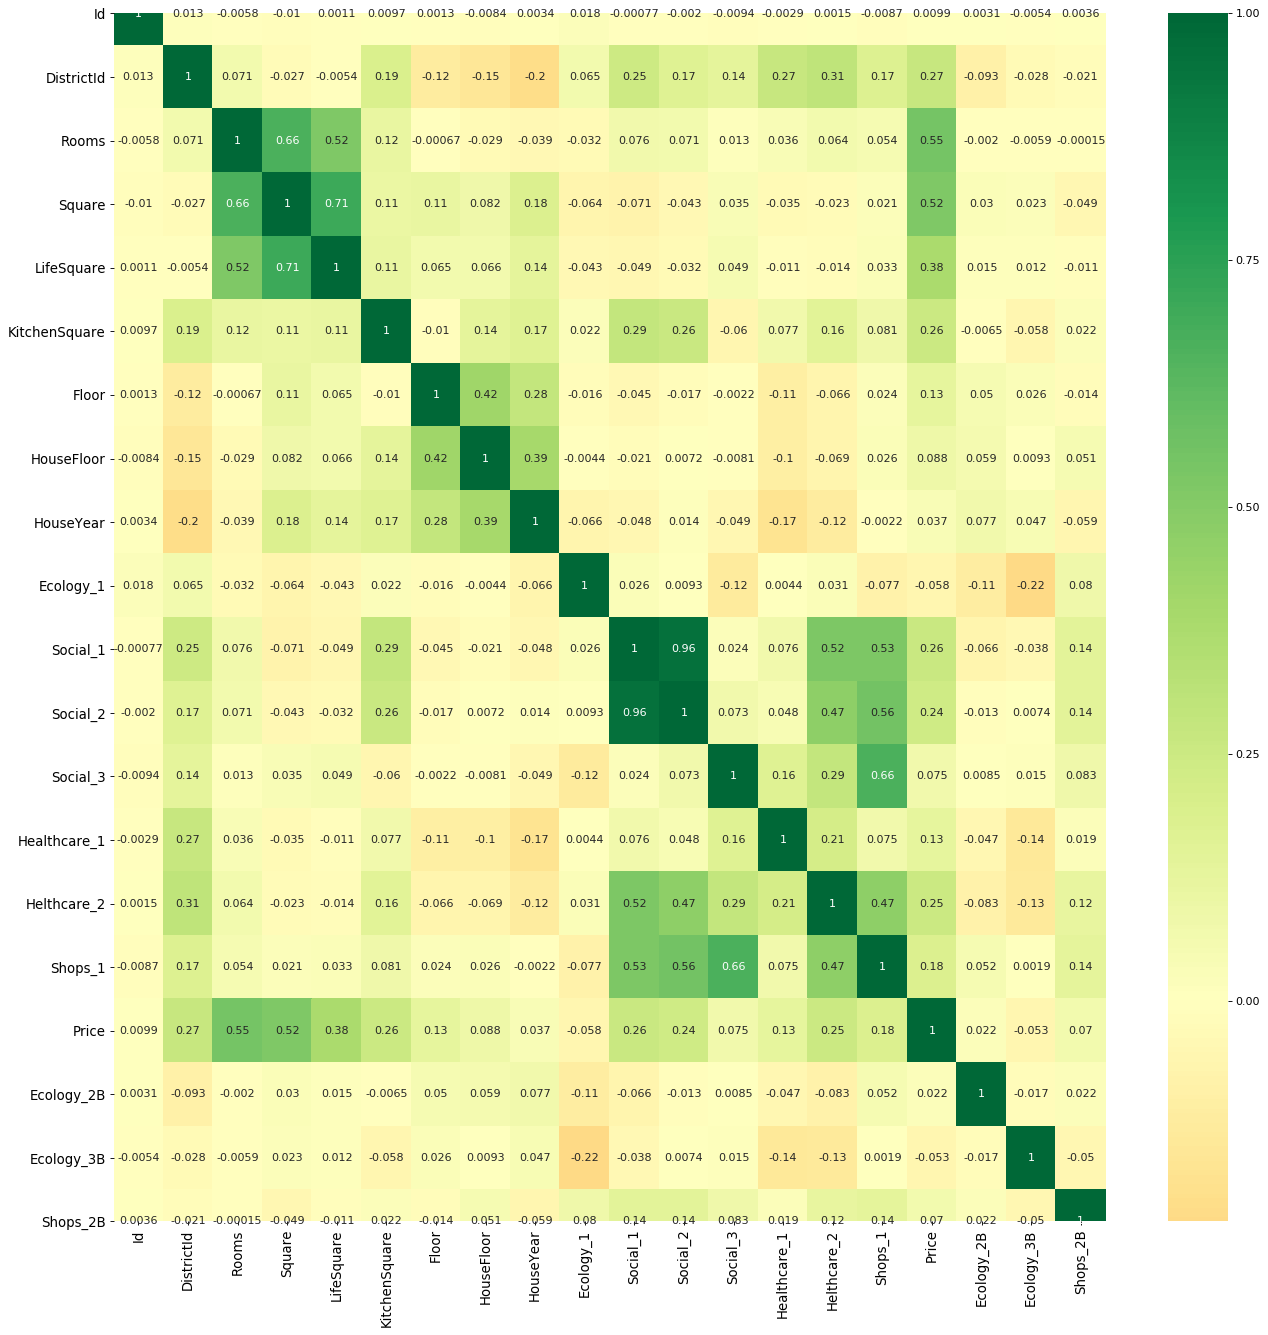

In [102]:
plt.figure(figsize = (20,20), dpi = 80)
sns.heatmap(df_az.corr(), xticklabels = df_az.corr().columns, yticklabels = df_az.corr().columns, cmap = 'RdYlGn', center = 0, annot = True)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [103]:
def new_features(df):
    df["Square_new"] = df["Square"] + df["LifeSquare"] + df["Rooms"] * 40
    df["Social_new"] = df["Shops_1"] + df["Social_1"] + df["Social_2"]/1000 + df["Social_3"] + df["Helthcare_2"]

In [104]:
new_features(df_train)

In [106]:
features_del = ["Square", "LifeSquare", "Rooms", "Shops_1", "Social_1", "Social_2", "Social_3", "Helthcare_2"]

In [107]:
df_train.drop(columns = features_del)

,Id,DistrictId,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Healthcare_1,Shops_2,Price,Ecology_2B,Ecology_3B,Shops_2B,Square_new,Social_new
0,14038,35,6.0,7,9.0,1969.0,0.089040,B,B,900.0,B,184966.930730,1,1,1,157.424312,56.976
1,15053,41,8.0,7,9.0,1978.0,0.000070,B,B,240.0,B,300009.450063,1,1,1,225.733182,74.309
2,4765,53,0.0,8,12.0,1968.0,0.049637,B,B,229.0,B,220925.908524,1,1,1,154.145564,45.759
3,5809,58,9.0,8,17.0,1977.0,0.437885,B,B,1084.0,B,175616.227217,1,1,1,186.084493,36.735
4,10783,99,7.0,11,12.0,1976.0,0.012339,B,B,2078.0,B,150226.531644,1,1,1,103.425361,47.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,5.0,6,5.0,1968.0,0.135650,B,B,350.0,B,196684.316040,1,1,1,160.877988,73.960
9996,6159,18,9.0,13,13.0,2000.0,0.000000,B,B,900.0,A,189050.289571,1,1,0,102.060762,40.562
9997,5123,27,1.0,12,16.0,2015.0,0.072158,B,B,900.0,A,159143.805370,1,1,0,120.720268,3.629
9998,5400,75,8.0,1,5.0,1961.0,0.307467,B,A,325.0,B,181595.339808,1,0,1,157.442709,51.048


# Строим модель случайного леса

In [115]:
model = RandomForestRegressor(n_estimators = 1000, max_features = 7, min_samples_leaf = 1, max_depth = 29, random_state = 42)

In [116]:
X_train = (df_train.drop(columns = ["Price"])).select_dtypes(include = ["float64", "int64","uint8"])

In [117]:
y_train = df_train['Price']

In [118]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=29,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [119]:
y_pred = model.predict(X_train)

In [120]:
r2_score(y_train, y_pred)

0.9653513035379079

# Проделываем обработку тестовых данных такую же как и на тренировочных

In [121]:
null_to_median(df_test, "LifeSquare")
null_to_median(df_test, "Healthcare_1")
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,35.455604,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,15.920269,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.781260,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [122]:
df_test = get_dummies(df_test, "Ecology_2")
df_test = get_dummies(df_test, "Ecology_3")
df_test = get_dummies(df_test, "Shops_2")

In [123]:
fix_data(df_test)

In [124]:
new_features(df_test)

In [125]:
df_test.drop(columns = features_del)

,Id,DistrictId,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Healthcare_1,Shops_2,Ecology_2B,Ecology_3B,Shops_2B,Square_new,Social_new
0,725,58,6.0,6,14.0,1972.0,0.310199,B,B,900.0,B,1,1,1,163.315425,14.748
1,15856,74,1.0,6,1.0,1977.0,0.075779,B,B,900.0,B,1,1,1,182.044444,12.437
2,5480,190,12.0,2,5.0,1909.0,0.000000,B,B,4702.0,B,1,1,1,62.086212,134.538
3,15664,47,9.0,22,22.0,2007.0,0.101872,B,B,900.0,B,1,1,1,204.987451,36.583
4,14275,27,1.0,17,17.0,2017.0,0.072158,B,B,900.0,A,1,1,0,130.914680,3.629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,6.0,5,9.0,1973.0,0.000170,B,B,900.0,B,1,1,1,237.943709,43.992
4996,4695,1,10.0,12,17.0,2017.0,0.007122,B,B,900.0,B,1,1,1,102.005533,2.264
4997,5783,12,9.0,23,22.0,1989.0,0.090799,B,B,900.0,B,1,1,1,246.124803,115.083
4998,4780,62,0.0,4,0.0,1977.0,0.072158,B,B,900.0,A,1,1,0,194.086482,3.629


# Делаем предсказания и оформляем в том виде, в котором требуется

In [127]:
y_test_pred = model.predict(df_test.select_dtypes(include = ["float64", "int64","uint8"]))

In [128]:
y_2 = df_test['Id'].copy()

In [129]:
df_yy = pd.DataFrame(y_2.values, columns = ['Id'])

In [130]:
df_yy['Price'] = y_test_pred
df_yy

,Id,Price
0,725,162660.633771
1,15856,229380.417676
2,5480,206886.801807
3,15664,331081.022803
4,14275,143571.723177
...,...,...
4995,8180,254837.483481
4996,4695,126686.114041
4997,5783,328282.129653
4998,4780,200180.700883


In [131]:
df_yy.to_csv("STsoy_prediction.csv", index = False)